<a href="https://colab.research.google.com/github/Shadi-Aldbaiss/Data-Preprocessing/blob/main/DataPreprocessing_clv_data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Library :**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Read dataset**

In [ ]:
# Import the dataset
df = pd.read_csv('/content/clv_data.csv')

# **Discovering dataset**

In [ ]:
df.head()

,Unnamed: 0,id,age,gender,income,days_on_platform,city,purchases
0,0,0,NaN,Male,126895,14.0,San Francisco,0
1,1,1,NaN,Male,161474,14.0,Tokyo,0
2,2,2,24.0,Male,104723,34.0,London,1
3,3,3,29.0,Male,43791,28.0,London,2
4,4,4,18.0,Female,132181,26.0,London,2


In [ ]:
df.tail()

,Unnamed: 0,id,age,gender,income,days_on_platform,city,purchases
4995,4995,4995,NaN,Female,212261,28.0,San Francisco,1
4996,4996,4996,NaN,Male,70228,12.0,San Francisco,0
4997,4997,4997,NaN,Male,64995,14.0,New York City,0
4998,4998,4998,NaN,Male,56144,4.0,New York City,2
4999,4999,4999,NaN,Female,110977,29.0,London,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5000 non-null   int64  
 1   id                5000 non-null   int64  
 2   age               2554 non-null   float64
 3   gender            5000 non-null   object 
 4   income            5000 non-null   int64  
 5   days_on_platform  4859 non-null   float64
 6   city              5000 non-null   object 
 7   purchases         5000 non-null   int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 312.6+ KB


In [ ]:
df.shape

(5000, 8)

In [ ]:
df.describe()

,Unnamed: 0,id,age,income,days_on_platform,purchases
count,5000.000000,5000.000000,2554.000000,5000.000000,4859.000000,5000.000000
mean,2499.500000,2499.500000,30.202036,79593.336200,24.389998,1.101000
std,1443.520003,1443.520003,12.129439,60304.056095,18.153388,1.181473
min,0.000000,0.000000,10.000000,4.000000,1.000000,0.000000
25%,1249.750000,1249.750000,19.000000,32752.500000,10.000000,0.000000
50%,2499.500000,2499.500000,30.000000,65989.000000,21.000000,1.000000
75%,3749.250000,3749.250000,41.000000,115406.500000,35.000000,2.000000
max,4999.000000,4999.000000,50.000000,388572.000000,111.000000,6.000000


In [ ]:
# Check for missing values in each column
df.isnull().sum()

,0
Unnamed: 0,0
id,0
age,2446
gender,0
income,0
days_on_platform,141
city,0
purchases,0


In [ ]:
# List all categorical columns and their unique values
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

gender: ['Male' 'Female']
city: ['San Francisco' 'Tokyo' 'London' 'New York City' 'Miami']


# **Handle Missing Values**

In [ ]:

# Fill missing values with mean
df_copy=df.copy()
df_copy['age'] = df_copy['age'].fillna(df_copy['age'].mean())
df_copy['days_on_platform'] = df_copy['days_on_platform'].fillna(df_copy['days_on_platform'].mean())
print(df_copy.isnull().sum())


Unnamed: 0          0
id                  0
age                 0
gender              0
income              0
days_on_platform    0
city                0
purchases           0
dtype: int64


# **EDA**

## **UNIVARIATE ANALYSIS**

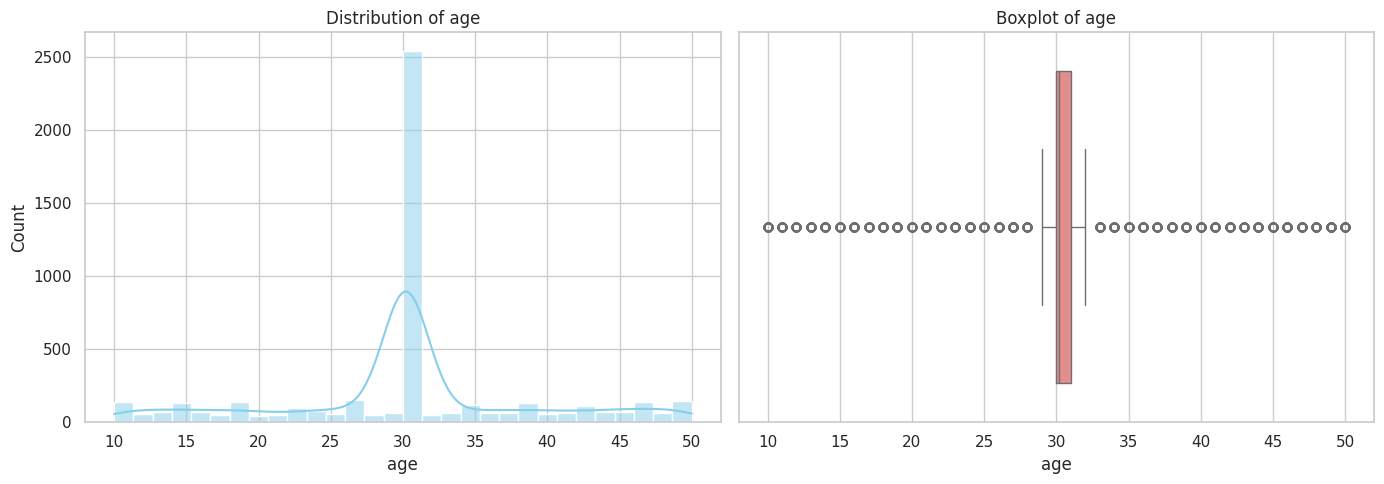

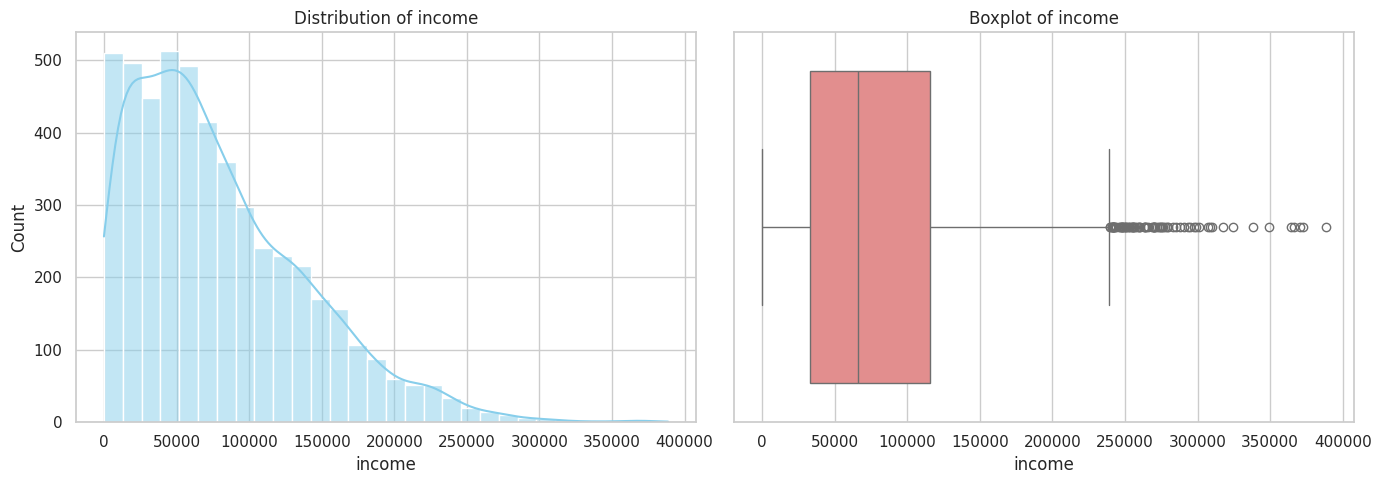

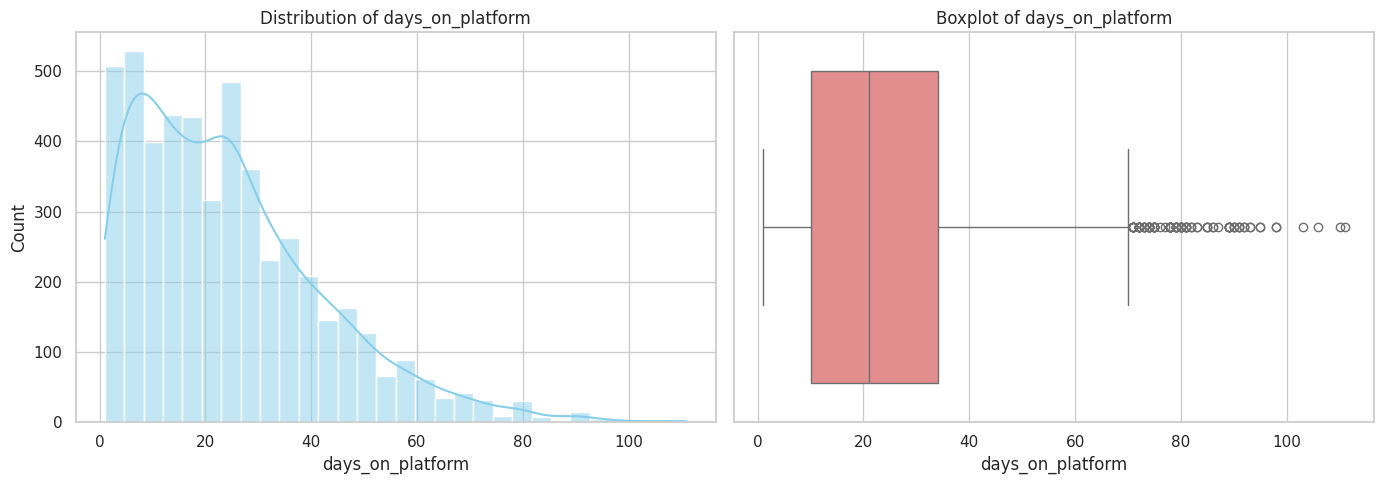

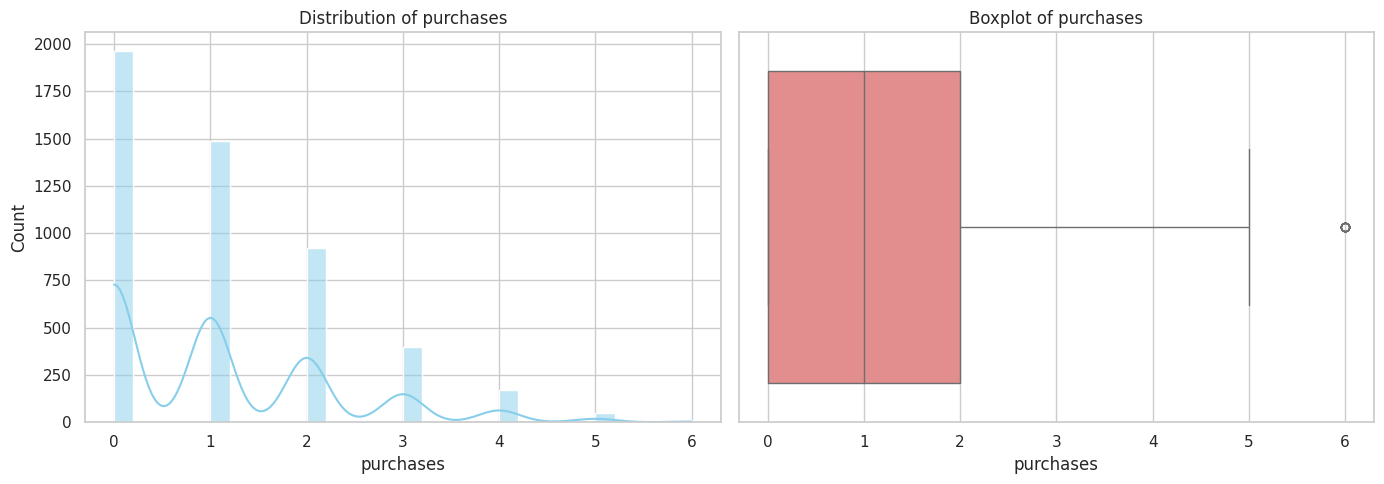

In [ ]:
# Set the style
sns.set(style="whitegrid")

# Numerical columns
numerical_cols = ['age', 'income', 'days_on_platform','purchases']

# Loop through numerical columns
for col in numerical_cols:
    plt.figure(figsize=(14, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df_copy[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_copy[col], color='lightcoral')
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

# **Handle Outliers**

In [ ]:
#Detect Outliers (IQR Method)

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return outliers

numerical_cols = ['age', 'income', 'days_on_platform','purchases']
# Detect outliers in the numerical_cols

for col in numerical_cols:
    outliers = detect_outliers_iqr(df_copy, col)
    print(f"Number of outliers in {col}: {len(outliers)}")


# Remove outliers in 'purchases'
Q1 = df_copy['purchases'].quantile(0.25)
Q3 = df_copy['purchases'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df_copy = df_copy[(df_copy['purchases'] >= lower) & (df_copy['purchases'] <= upper)]




#Winsorize: cap values at 5th and 95th percentiles

# age :
lower_cap = df_copy['age'].quantile(0.05)
upper_cap = df_copy['age'].quantile(0.95)
df_copy['age'] = np.where(df_copy['age'] < lower_cap, lower_cap, df_copy['age'])
df_copy['age'] = np.where(df_copy['age'] > upper_cap, upper_cap, df_copy['age'])

# income :
lower_cap_income = df_copy['income'].quantile(0.05)
upper_cap_income = df_copy['income'].quantile(0.95)
df_copy['income'] = np.where(df_copy['income'] < lower_cap_income, lower_cap_income, df_copy['income'])
df_copy['income'] = np.where(df_copy['income'] > upper_cap_income, upper_cap_income, df_copy['income'])

# days_on_platform :
days_on_platform_lower_cap = df_copy['days_on_platform'].quantile(0.05)
days_on_platform_upper_cap = df_copy['days_on_platform'].quantile(0.95)
df_copy['days_on_platform'] = np.where(df_copy['days_on_platform'] < days_on_platform_lower_cap, days_on_platform_lower_cap, df_copy['days_on_platform'])
df_copy['days_on_platform'] = np.where(df_copy['days_on_platform'] > days_on_platform_upper_cap, days_on_platform_upper_cap, df_copy['days_on_platform'])


print('--------------------------------------------')
for col in numerical_cols:
    outliers = detect_outliers_iqr(df_copy, col)
    print(f"Number of outliers in {col}: {len(outliers)}")





Number of outliers in age: 2340
Number of outliers in income: 0
Number of outliers in days_on_platform: 0
Number of outliers in purchases: 0
--------------------------------------------
Number of outliers in age: 2340
Number of outliers in income: 0
Number of outliers in days_on_platform: 0
Number of outliers in purchases: 0
